In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import random
from google.colab import drive
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import pearsonr

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
countries = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Quality of life in a country comparison.csv')

Mounted at /content/gdrive


In [3]:
countries.tail()

,Unnamed: 0,Rank,Country,Stability(15%),Rights(20%),Health(15%),Safety(10%),Climate(15%),Costs(15%),Popularity(10%),TotalQuality of life(100%)
132,132,133,Cameroon,40,19,9,27,60,51,34,34
133,133,134,Nigeria,18,24,12,23,53,57,41,32
134,134,135,Chad,46,12,0,31,50,49,44,32
135,135,136,Sudan,8,11,18,55,40,66,24,30
136,136,137,Congo (Dem. Republic),32,7,6,10,54,60,36,29


In [4]:
countries = countries.drop("Unnamed: 0", axis=1)

drop para tirar uma tabela inutil que apenas contava o index denovo.

In [5]:
countries.columns

Index(['Rank', 'Country', 'Stability(15%)', 'Rights(20%)', 'Health(15%)',
       'Safety(10%)', 'Climate(15%)', 'Costs(15%)', 'Popularity(10%)',
       'TotalQuality of life(100%)'],
      dtype='object')

In [6]:
countries.shape

(137, 10)

#Análise Exploratórias

Análise exploratória de dados é uma técnica estatística que visa examinar os dados de uma determinada amostra ou conjunto de dados, a fim de entender melhor suas características e identificar padrões e tendências.

A analisar e resumir os principais recursos de um conjunto de dados

In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rank                        137 non-null    int64 
 1   Country                     137 non-null    object
 2   Stability(15%)              137 non-null    int64 
 3   Rights(20%)                 137 non-null    int64 
 4   Health(15%)                 137 non-null    int64 
 5   Safety(10%)                 137 non-null    int64 
 6   Climate(15%)                137 non-null    int64 
 7   Costs(15%)                  137 non-null    int64 
 8   Popularity(10%)             137 non-null    int64 
 9   TotalQuality of life(100%)  137 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.8+ KB


In [8]:
countries.describe()

,Rank,Stability(15%),Rights(20%),Health(15%),Safety(10%),Climate(15%),Costs(15%),Popularity(10%),TotalQuality of life(100%)
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.000000,57.576642,50.686131,58.124088,76.781022,53.233577,52.343066,37.978102,54.802920
std,39.692569,19.328706,25.142755,26.093284,21.791362,19.960720,11.612897,12.050425,10.887013
min,1.000000,8.000000,7.000000,0.000000,4.000000,2.000000,23.000000,11.000000,29.000000
25%,35.000000,46.000000,32.000000,42.000000,69.000000,42.000000,44.000000,31.000000,47.000000
50%,69.000000,57.000000,45.000000,63.000000,85.000000,53.000000,54.000000,37.000000,54.000000
75%,103.000000,72.000000,72.000000,80.000000,93.000000,68.000000,61.000000,42.000000,64.000000
max,137.000000,93.000000,100.000000,100.000000,100.000000,95.000000,76.000000,73.000000,76.000000


array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Stability(15%)'}>,
        <Axes: title={'center': 'Rights(20%)'}>],
       [<Axes: title={'center': 'Health(15%)'}>,
        <Axes: title={'center': 'Safety(10%)'}>,
        <Axes: title={'center': 'Climate(15%)'}>],
       [<Axes: title={'center': 'Costs(15%)'}>,
        <Axes: title={'center': 'Popularity(10%)'}>,
        <Axes: title={'center': 'TotalQuality of life(100%)'}>]],
      dtype=object)

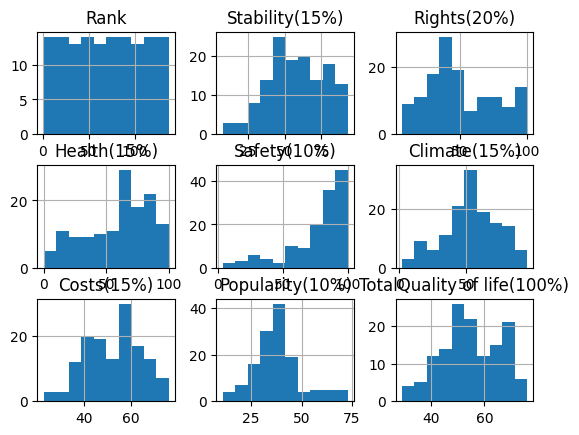

In [9]:
countries.hist()

Aqui Criamos um histograma para ter uma noção da frequencia em que cada valor aparece no no dataset.

Criamos um heatmap para ficar mais fácil a visualização dos dados que estão correlacionados.

#Analise explanatoria


Análise explanatória refere-se a uma análise de dados que tem como objetivo explicar e entender a relação entre variáveis. Ela é usada para identificar padrões, relações e causas que podem explicar o comportamento ou o resultado de um fenômeno ou evento. A análise explanatória geralmente envolve a utilização de técnicas estatísticas e modelos matemáticos para encontrar explicações plausíveis para os resultados observados.

<ipython-input-10-7e9c2a9e51e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = countries.corr()


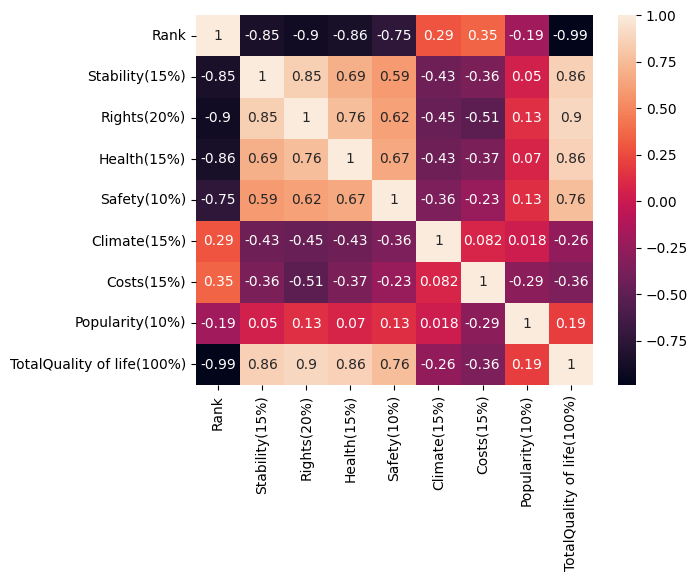

In [10]:
corr_matrix = countries.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Analisando as correlações podemos concluir que quase todas as variaveis tem correlação forte com o Rank de melhor país, menos as variaveis Climate, Costs e Popularity.

Faz sentido essas variaveis não terem relação direta com o Rank do país, pois tratam de medidas que não abordam, diretamente, com a qualidade de vida de um país. Por exemplo, é possivel que um pais tenha uma qualidade de vida alta mesmo tendo um clima ruim ou uma má poluraridade com estrangeiros, e sobre os custos, o país pode ter altos custos de impostos, que se bem usados podem gerar boa qualidade de vida.

Vale ressaltar que a correlaçao das demais variaveis com o Rank é proxima de -1, ou seja, inversa, pois a coluna Rank é enumerada de forma decrescente, e as variaveis tem um padrão de quão maior melhor. 

#Qualitativas X Quantitativas

A análise qualitativa é uma abordagem utilizada em pesquisas científicas e sociais que se concentra em compreender os fenômenos estudados por meio de dados não numéricos. Essa análise é caracterizada por sua natureza exploratória e interpretativa, permitindo a obtenção de insights mais profundos sobre o comportamento humano, atitudes e valores.

A análise qualitativa envolve a coleta e análise de dados que não podem ser quantificados facilmente, como observações, entrevistas, documentos e material audiovisual. Esses dados são analisados em busca de padrões, temas e categorias que possam ajudar a entender melhor o fenômeno estudado.

**Qualitativa**

--> É esperado que os países no topo do rank do dataset sejam os melhores em todos as colunas

--> Países no fundo do rank são os países que tem as piores notas em cada coluna

--> Países no meio do rank são os países com todas as notas de cada coluna na média


**Quantitativa**

A análise quantitativa é um método utilizado em pesquisas científicas e de mercado que se concentra em medir e analisar dados numéricos, geralmente por meio de técnicas estatísticas. Essa análise é caracterizada por seu rigor e objetividade, permitindo a obtenção de resultados precisos e confiáveis.

In [11]:
print("Media da nota de custo do top 5 países: ",np.mean(countries['Costs(15%)'][:5]))

print("Media da nota de custo do rank 26 ao 30: ",np.mean(countries['Costs(15%)'][26:30]))

Media da nota de custo do top 5 países:  50.0
Media da nota de custo do rank 26 ao 30:  60.75


Como podemos ver nem sempre os países com um maior rank no dataset vai ter as maiores notas em qualquer topíco.

In [12]:
print("Media da nota de custo do país top 3: ",np.mean(countries['Costs(15%)'][3]))

Media da nota de custo do país top 3:  44.0


In [13]:
print("Media da nota de custo dos países: ",np.mean(countries['Costs(15%)']))

Media da nota de custo dos países:  52.34306569343066


Como podemos ver, o pais top 3 está bem abaixo da media.

Sendo assim, o dataset é facilmente utilizado para explorar dados quantitativas levando em consideração que 9 das 10 colunas do dataset são notas, ou seja, podem ser analisadas estaticamente, fazer media, desvio padrão, variancia, etc.

# Análise quanto a: séries temporais, se os são dados hierárquicos, categóricos, relacionados, contínuos, discretos, se possui relação de linearidade ou não-linearidade.

**Series Temporais**

Levando em consideração que o nosso dataset é feito por dados de países que são bastante variados como a economia e popularidade de um país, podemos considerar que a maior parte dos nossos dados são dados de series temporais.

**Dados Hierárquicos**

Acreditamos que não temos dados do tipo hierarquico no nosso dataset. Inicialmente ponderamos se os pesos dados às categorias seriam dados hierarquicos, porém não é possível afirmar se os dados são hierárquicos apenas com base nos pesos atribuídos a cada coluna. Os pesos indicam apenas a importância relativa de cada coluna para um determinado cálculo ou análise, mas não necessariamente indicam que os dados estejam organizados em uma estrutura hierárquica.

**Dados Categóricos**

In [14]:
countries.dtypes

Rank                           int64
Country                       object
Stability(15%)                 int64
Rights(20%)                    int64
Health(15%)                    int64
Safety(10%)                    int64
Climate(15%)                   int64
Costs(15%)                     int64
Popularity(10%)                int64
TotalQuality of life(100%)     int64
dtype: object

Como visto na tabela abaixo, cada país é uma categoria separada e distinta, sem ordem natural ou numérica.

Então podemos dizer que temos os dois tipos de dados categóricos, os nominais, utilizados nos nomes dos países e os ordinais que é mostrado no resto do dataaset por ter apenas números.


In [15]:
countries.head()

,Rank,Country,Stability(15%),Rights(20%),Health(15%),Safety(10%),Climate(15%),Costs(15%),Popularity(10%),TotalQuality of life(100%)
0,1,Australia,86,92,87,100,90,23,41,76
1,2,San Marino,81,82,91,87,62,61,47,74
2,3,Hong Kong,77,85,100,97,49,61,41,74
3,4,Switzerland,91,99,93,99,34,44,46,74
4,5,Macao,90,71,100,93,48,61,44,73


**Dados relacionados**

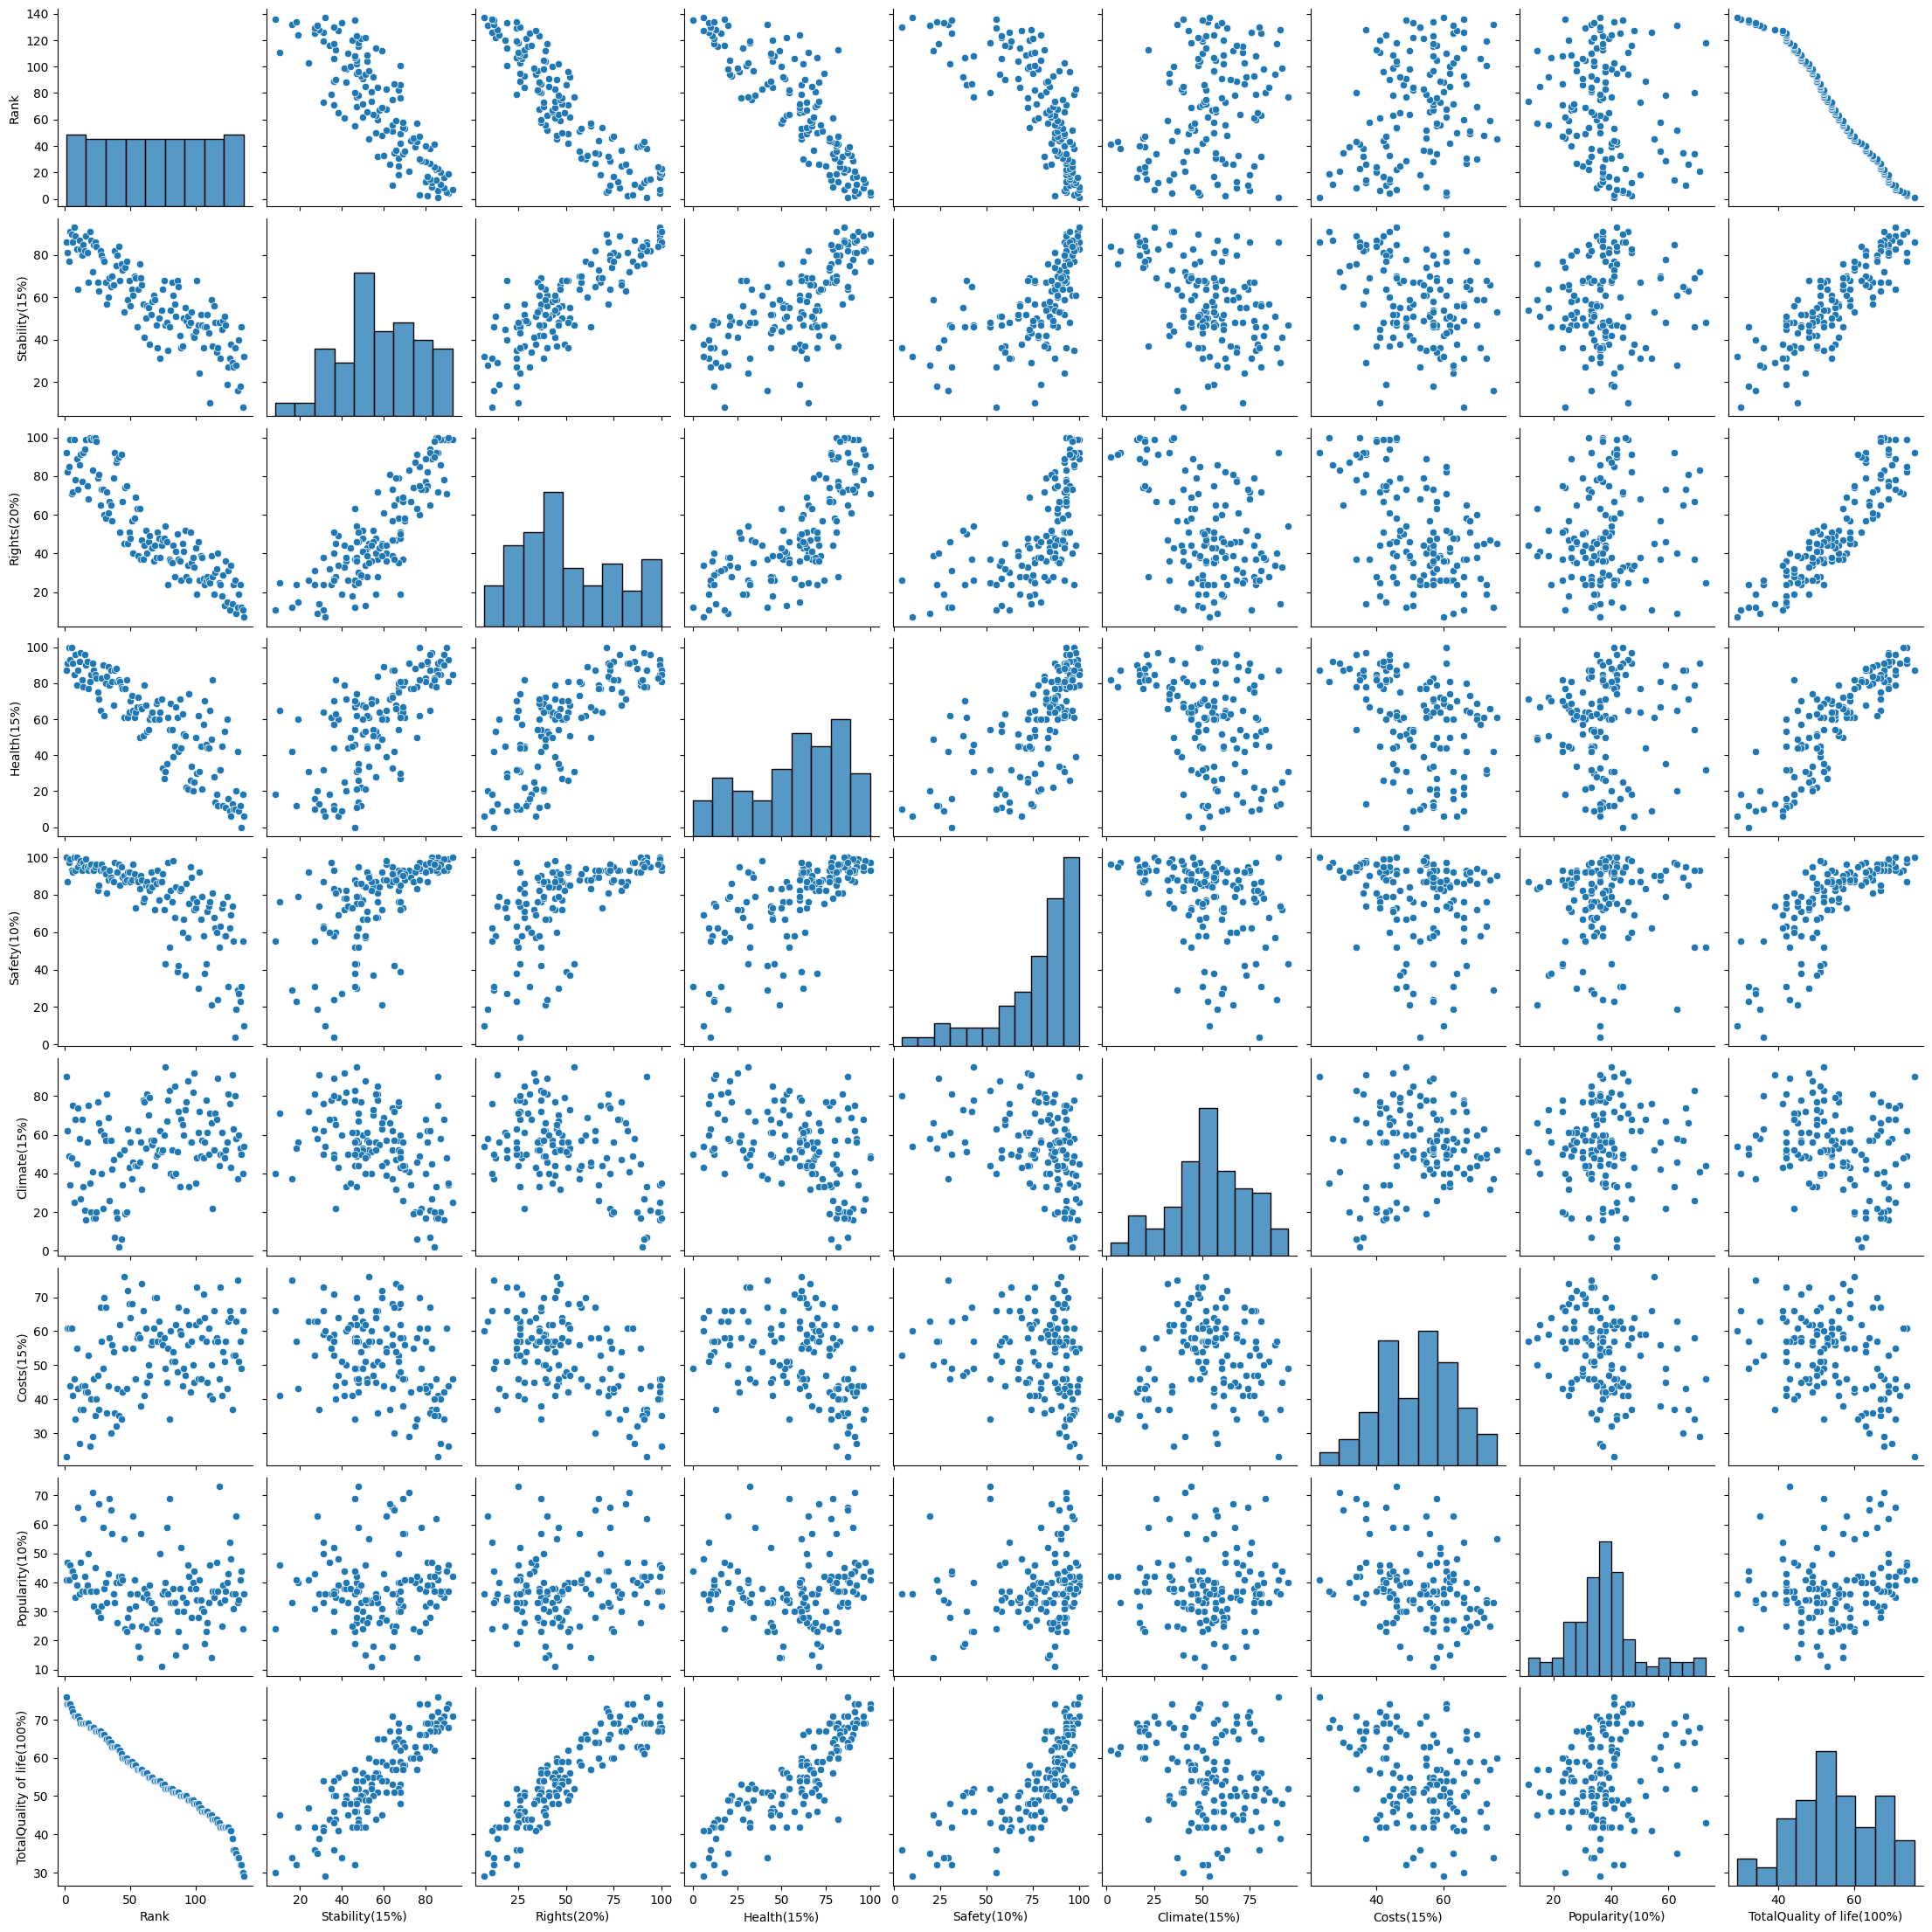

In [16]:
col = ['Rank', 'Stability(15%)', 'Rights(20%)', 'Health(15%)', 'Safety(10%)', 'Climate(15%)', 'Costs(15%)', 'Popularity(10%)', 'TotalQuality of life(100%)']
sns.pairplot(countries[col])

O Total é um dado relacionado, ele precisa dos valores de todas as colunas para formar o total. Porém, todos as outras colunas não são relacionais, podemos ver isso quando fazemos a relação entre duas colunas, onde conseguimos enxergar que somente nas colunas que relacionam total a outra, possui uma relação.

**Dados continuos**

Não temos dados continuos, todos os nossos dados são discretos.

**Dados Discretos**


In [17]:
fig = px.histogram(countries, x = 'TotalQuality of life(100%)', marginal = 'rug')
fig.show()

Todos os dados do dataset (menos o nome do país) são discretos, como exemplo temos o total, que é coluna que possui somente números inteiros, isso pode ser visto no histograma acima.

**Relação de linearidade ou não linearidade**

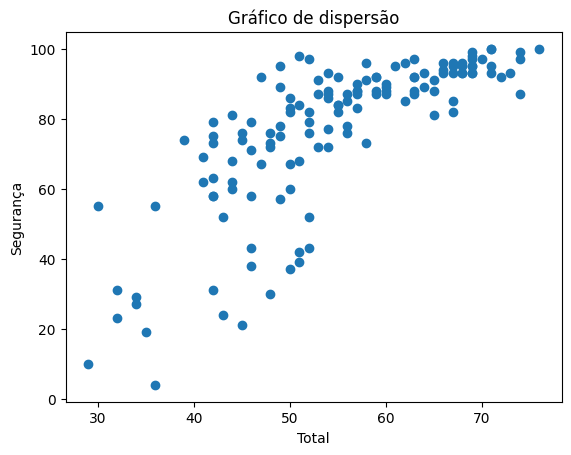

In [18]:
plt.scatter(countries['TotalQuality of life(100%)'], countries['Safety(10%)'])

plt.xlabel("Total")
plt.ylabel("Segurança")
plt.title("Gráfico de dispersão")
plt.show()

Se for comparar qualquer coluna, vai ser algo não constante, pois não necessariamente um país de rank mais baixo tem uma segurança pior do que um país de rank mais alto. Ou seja, eles não são lineares

#Geral

# Media

In [19]:
countries.mean()

<ipython-input-19-91b66acbfc40>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Rank                          69.000000
Stability(15%)                57.576642
Rights(20%)                   50.686131
Health(15%)                   58.124088
Safety(10%)                   76.781022
Climate(15%)                  53.233577
Costs(15%)                    52.343066
Popularity(10%)               37.978102
TotalQuality of life(100%)    54.802920
dtype: float64

# Mediana

In [20]:
countries.median()

<ipython-input-20-118932488e21>:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Rank                          69.0
Stability(15%)                57.0
Rights(20%)                   45.0
Health(15%)                   63.0
Safety(10%)                   85.0
Climate(15%)                  53.0
Costs(15%)                    54.0
Popularity(10%)               37.0
TotalQuality of life(100%)    54.0
dtype: float64

# Tratamento de dados

In [21]:
countries.drop(['Country'], axis=1, inplace=True)

# Boxplot

In [22]:
fig2 = px.box(countries)
fig2.show()

# Matriz de correlação 

# Estatísticas das distribuições

In [23]:
df = pd.cut(countries['TotalQuality of life(100%)'], 4)
df.value_counts()

(40.75, 52.5]      51
(52.5, 64.25]      43
(64.25, 76.0]      33
(28.953, 40.75]    10
Name: TotalQuality of life(100%), dtype: int64

In [24]:
51+43+33+10

137

In [25]:
countries['TotalQuality of life(100%)'].count()

137

count     4.000000
mean     34.250000
std      17.764665
min      10.000000
25%      27.250000
50%      38.000000
75%      45.000000
max      51.000000
Name: TotalQuality of life(100%), dtype: float64

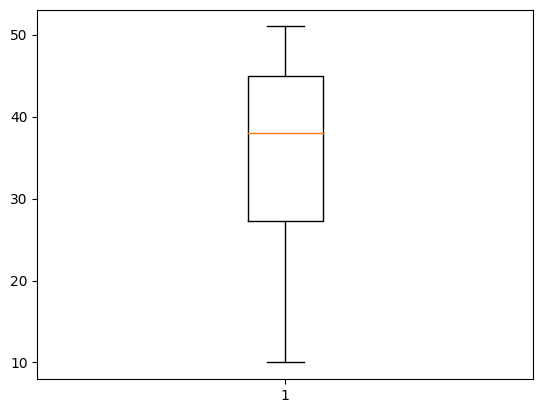

In [26]:
non_norm = df.value_counts()
plt.boxplot(non_norm)
non_norm.describe()

#Amostra Total Quality

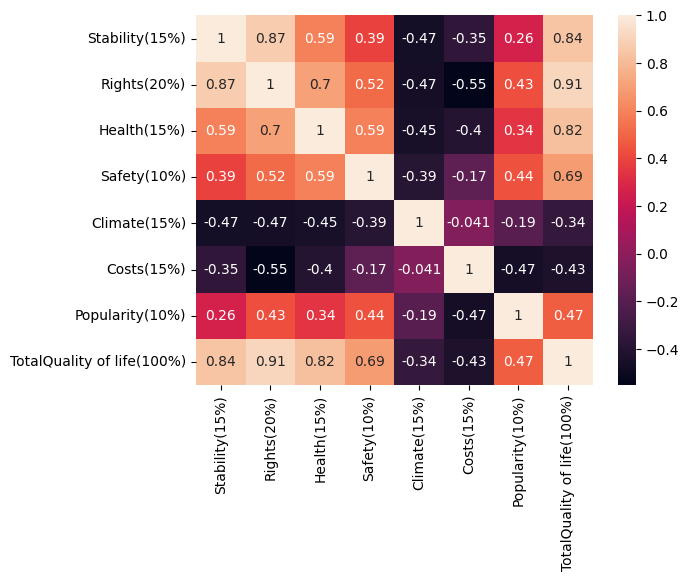

In [27]:
rolsTotal = pd.DataFrame(countries, columns = ["Stability(15%)", "Rights(20%)", "Health(15%)", "Safety(10%)", "Climate(15%)", "Costs(15%)", "Popularity(10%)", "TotalQuality of life(100%)"])
rolsTotal = rolsTotal.sample(n = int((137/100) * 30))

corr_matrix2 = rolsTotal.corr()
sns.heatmap(corr_matrix2, annot=True)
plt.show()

Média Amostra

In [28]:
mediaTotal = rolsTotal.mean()
print(mediaTotal)

Stability(15%)                58.512195
Rights(20%)                   55.414634
Health(15%)                   62.780488
Safety(10%)                   79.024390
Climate(15%)                  56.487805
Costs(15%)                    51.195122
Popularity(10%)               37.414634
TotalQuality of life(100%)    57.146341
dtype: float64


Mediana Amostra

In [29]:
medianaTotal = rolsTotal.median()
print(medianaTotal)

Stability(15%)                56.0
Rights(20%)                   48.0
Health(15%)                   66.0
Safety(10%)                   87.0
Climate(15%)                  57.0
Costs(15%)                    50.0
Popularity(10%)               36.0
TotalQuality of life(100%)    56.0
dtype: float64


Boxplot Amostra

In [30]:
boxSample = px.box(rolsTotal)
boxSample.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f883fc52c80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f883fc531c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f883fc529e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f883fc53700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f883fc539a0>],
 'means': []}

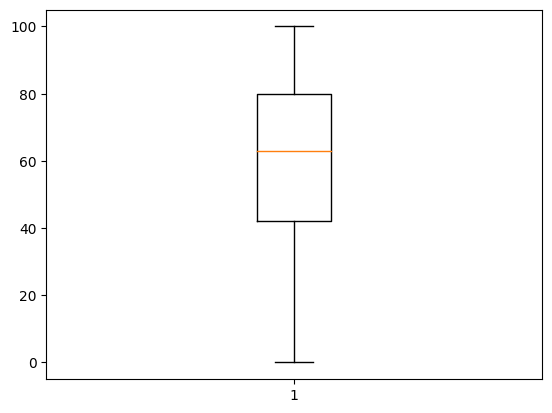

In [31]:
plt.boxplot(countries['Health(15%)'])

Matriz de correlação da base na amostra


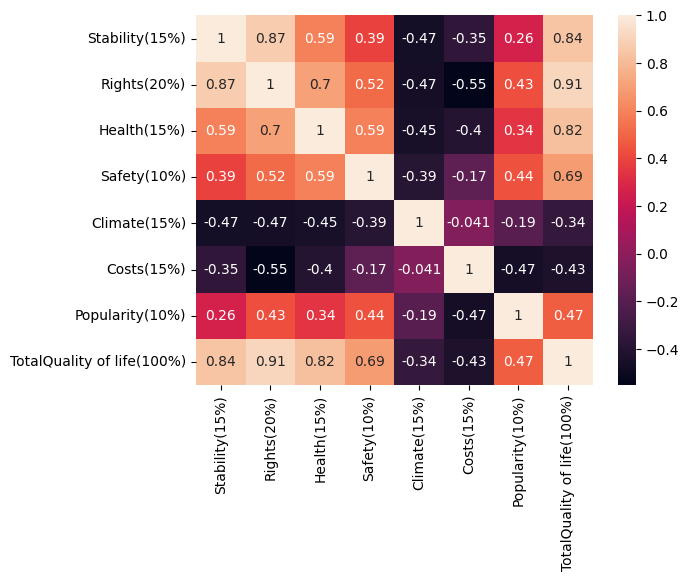

In [32]:
corr_matrix = rolsTotal.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Estatística de distribuição

array([[<Axes: title={'center': 'Stability(15%)'}>,
        <Axes: title={'center': 'Rights(20%)'}>,
        <Axes: title={'center': 'Health(15%)'}>],
       [<Axes: title={'center': 'Safety(10%)'}>,
        <Axes: title={'center': 'Climate(15%)'}>,
        <Axes: title={'center': 'Costs(15%)'}>],
       [<Axes: title={'center': 'Popularity(10%)'}>,
        <Axes: title={'center': 'TotalQuality of life(100%)'}>, <Axes: >]],
      dtype=object)

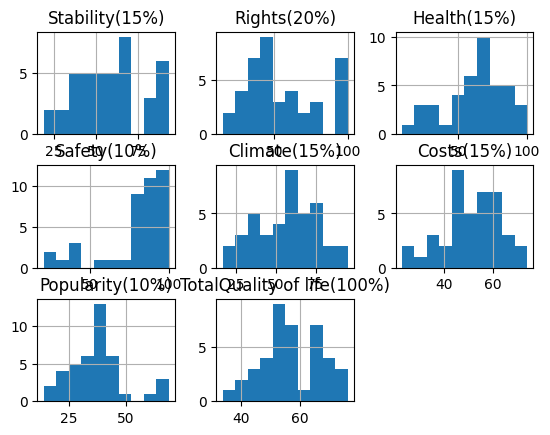

In [33]:
rolsTotal.hist()


In [34]:
np.std(countries)

Rank                          39.547440
Stability(15%)                19.258034
Rights(20%)                   25.050825
Health(15%)                   25.997879
Safety(10%)                   21.711686
Climate(15%)                  19.887737
Costs(15%)                    11.570437
Popularity(10%)               12.006365
TotalQuality of life(100%)    10.847207
dtype: float64

In [35]:
np.std(rolsTotal)

Stability(15%)                19.594825
Rights(20%)                   24.192294
Health(15%)                   21.866013
Safety(10%)                   20.692272
Climate(15%)                  18.897828
Costs(15%)                    11.772683
Popularity(10%)               12.267299
TotalQuality of life(100%)     9.839098
dtype: float64

In [36]:
np.var(countries)

Rank                          1564.000000
Stability(15%)                 370.871863
Rights(20%)                    627.543822
Health(15%)                    675.889712
Safety(10%)                    471.397304
Climate(15%)                   395.522084
Costs(15%)                     133.875007
Popularity(10%)                144.152805
TotalQuality of life(100%)     117.661889
dtype: float64

In [37]:
np.var(rolsTotal)

Stability(15%)                383.957168
Rights(20%)                   585.267103
Health(15%)                   478.122546
Safety(10%)                   428.170137
Climate(15%)                  357.127900
Costs(15%)                    138.596074
Popularity(10%)               150.486615
TotalQuality of life(100%)     96.807852
dtype: float64

In [38]:
# Exemplo do Teste de Normalidade de Shapiro-Wilk
data = countries['TotalQuality of life(100%)'].dropna()
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.980, p=0.041
Provavelmente NÃO é uma Distribuição Normal


count    137.000000
mean      54.802920
std       10.887013
min       29.000000
25%       47.000000
50%       54.000000
75%       64.000000
max       76.000000
Name: TotalQuality of life(100%), dtype: float64

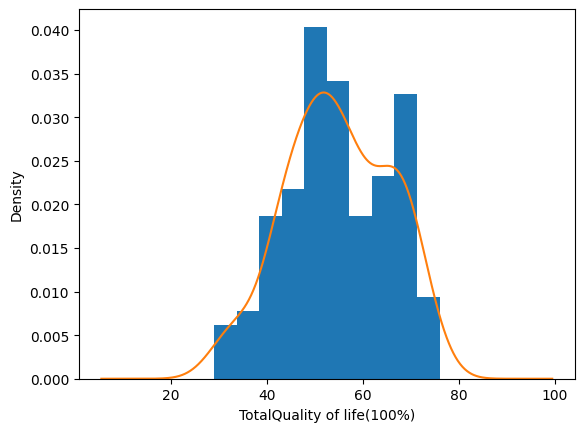

In [39]:
ax = countries['TotalQuality of life(100%)'].plot.hist(density=True)
countries['TotalQuality of life(100%)'].plot.density(ax=ax)
ax.set_xlabel('TotalQuality of life(100%)')
countries['TotalQuality of life(100%)'].describe()

In [40]:
# Exemplo de Teste de CorrelaÇão de Pearson
data1 = countries['TotalQuality of life(100%)'].dropna()
data2 = countries['TotalQuality of life(100%)'].dropna()
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Independente')
else:
	print('Provavelmente Dependente')

stat=1.000, p=0.000
Provavelmente Dependente


In [41]:
data2.count()

137

In [42]:
# Exemplo de Teste T - Student

data1 = countries['TotalQuality of life(100%)'].dropna()
data2 = countries['TotalQuality of life(100%)'].dropna()

if p > 0.05:
	print('Provavelmente a mesma distribuição')
else:
	print('Provavelmentes as distribuições são diferentes')

Provavelmentes as distribuições são diferentes


In [43]:
# Gerando três amostras independentes
amostra1 = np.random.normal(10, 2, 10)
amostra2 = np.random.normal(12, 2, 10)
amostra3 = np.random.normal(14, 2, 10)

# Executando o teste ANOVA
stat, p = f_oneway(amostra1, amostra2, amostra3)

# Imprimindo os resultados
print("Estatística de teste F: {:.3f}".format(stat))
print("valor-p: {:.3f}".format(p))

if p < 0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística de teste F: 11.683
valor-p: 0.000
Rejeitamos a hipótese nula.


##Pegando as 20 amostras e separando em 2 grupos de 10 amostras

In [44]:
amostras = []
amostras2 = []
for i in range(20):
  rolsTotal = pd.DataFrame(countries, columns = ["TotalQuality of life(100%)"])
  if(i < 10):
    amostras.append(rolsTotal.sample(n = int((137/100) * 30)))
  if(i >= 10 and i < 20):
    amostras2.append(rolsTotal.sample(n = int((137/100) * 30)))

# print(amostras)

##Calculando a média dos 2 grupos das amostras

In [45]:
amostras_average = []
amostras_average2 = []  

for i in range(10):
  amostras_average.append(amostras[i].mean())
print(amostras_average)

for i in range(10):
  amostras_average2.append(amostras2[i].mean())
print(amostras_average2)

[TotalQuality of life(100%)    55.756098
dtype: float64, TotalQuality of life(100%)    54.097561
dtype: float64, TotalQuality of life(100%)    53.902439
dtype: float64, TotalQuality of life(100%)    55.658537
dtype: float64, TotalQuality of life(100%)    53.731707
dtype: float64, TotalQuality of life(100%)    55.731707
dtype: float64, TotalQuality of life(100%)    53.756098
dtype: float64, TotalQuality of life(100%)    54.487805
dtype: float64, TotalQuality of life(100%)    55.707317
dtype: float64, TotalQuality of life(100%)    53.560976
dtype: float64]
[TotalQuality of life(100%)    55.95122
dtype: float64, TotalQuality of life(100%)    53.317073
dtype: float64, TotalQuality of life(100%)    54.97561
dtype: float64, TotalQuality of life(100%)    53.658537
dtype: float64, TotalQuality of life(100%)    52.512195
dtype: float64, TotalQuality of life(100%)    56.829268
dtype: float64, TotalQuality of life(100%)    56.268293
dtype: float64, TotalQuality of life(100%)    52.878049
dtype: f

##Calculando o Percentil 90

In [46]:
percentile = []
percentile2 = []

for i in range(20):
  if(i < 10):
    percentile.append(np.percentile(amostras[i], 90))
  if(i < 10):
    percentile2.append(np.percentile(amostras2[i], 90))
    
print(percentile)
print(percentile2)

[68.0, 68.0, 67.0, 69.0, 69.0, 69.0, 69.0, 69.0, 68.0, 67.0]
[69.0, 67.0, 69.0, 68.0, 67.0, 69.0, 69.0, 69.0, 69.0, 71.0]


##Gráficos das Medias

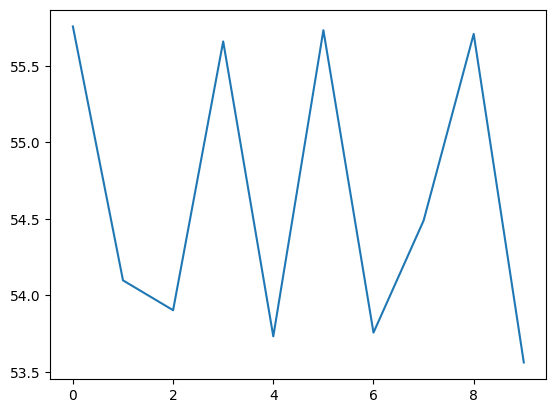

In [47]:
plt.plot(amostras_average)

plt.show()

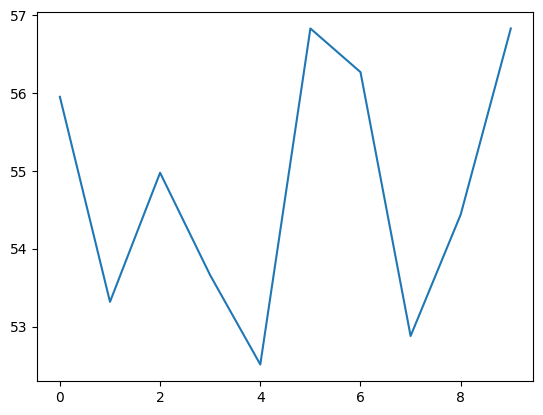

In [48]:
plt.plot(amostras_average2)

plt.show()

##Gráfico do percentil 90 

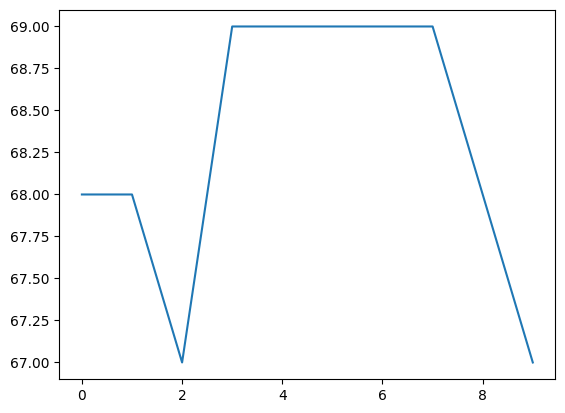

In [49]:
plt.plot(percentile)

plt.show()

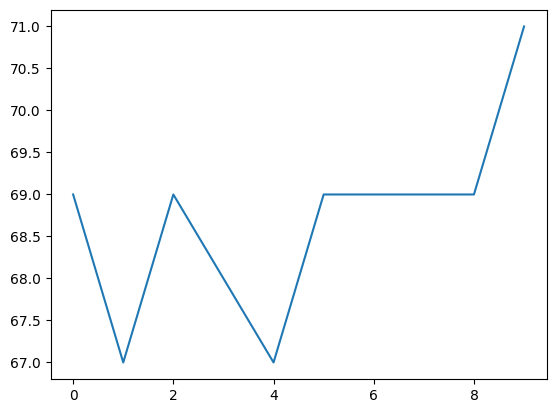

In [50]:
plt.plot(percentile2)

plt.show()

##Hipotese

In [51]:
print("Media 1: ", sum(percentile)/10)
print("Media 2: ", sum(percentile2)/10)

Media 1:  68.3
Media 2:  68.7


No cenário atual do mundo, um país com nota perto de 70 pode ser considerada bastante alta em relação aos demais. Podemos dizer que um país nota perto de 70 tem uma melhor nota que 90% dos países.


In [52]:
np.percentile(countries['TotalQuality of life(100%)'], 90)

69.0

##Verificar as Distribuições se: são independentes | seguem a mesma normal | e se são a mesma distribuição

Shapiro (Seguem uma normal?)


In [53]:
# Amostra Geral

stat, p = shapiro(amostras2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.978, p=0.000
Provavelmente NÃO é uma Distribuição Normal


In [54]:
# Percentil 90

stat, p = shapiro(percentile2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.829, p=0.033
Provavelmente NÃO é uma Distribuição Normal


In [55]:
# Media

stat, p = shapiro(amostras_average)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.799, p=0.014
Provavelmente NÃO é uma Distribuição Normal


T-Student (Mesma distruibuição?)

In [56]:
# Amostras Gerais
from scipy.stats import ttest_ind
data1 = rolsTotal.sample(n = int((137/100) * 30))
data2 = rolsTotal.sample(n = int((137/100) * 30))
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente a mesma distribuição')
else:
	print('Provavelmentes as distribuições são diferentes')

stat=0.521, p=0.604
Provavelmente a mesma distribuição


In [57]:
# Amostra Percentil 90

stat, p = ttest_ind(percentile, percentile2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente a mesma distribuição')
else:
	print('Provavelmentes as distribuições são diferentes')

stat=-0.889, p=0.385
Provavelmente a mesma distribuição


In [58]:
# Amostra Medias
stat, p = ttest_ind(amostras_average, amostras_average2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente a mesma distribuição')
else:
	print('Provavelmentes as distribuições são diferentes')

stat=-0.211, p=0.835
Provavelmente a mesma distribuição


Pearson (São indepentendes?)

In [59]:
# amostras

In [60]:
aux = np.ravel(amostras)

In [61]:
aux

array([55, 50, 51, 67, 35, 46, 59, 63, 62, 56, 60, 66, 49, 74, 63, 57, 51,
       47, 74, 68, 48, 57, 54, 42, 53, 54, 67, 59, 56, 73, 44, 58, 59, 50,
       71, 42, 64, 46, 56, 29, 51, 63, 51, 69, 71, 36, 34, 44, 63, 60, 52,
       55, 68, 59, 54, 65, 54, 76, 50, 42, 57, 50, 50, 69, 57, 57, 51, 41,
       51, 45, 67, 55, 48, 58, 32, 66, 48, 56, 42, 50, 48, 54, 50, 50, 51,
       60, 46, 67, 58, 56, 69, 52, 42, 63, 52, 55, 58, 45, 44, 63, 69, 43,
       36, 44, 66, 65, 57, 36, 42, 54, 54, 67, 46, 32, 42, 55, 65, 63, 71,
       57, 45, 64, 56, 46, 48, 62, 74, 70, 63, 36, 54, 50, 44, 35, 65, 46,
       64, 68, 44, 60, 41, 67, 43, 59, 66, 51, 42, 54, 56, 69, 52, 51, 57,
       53, 64, 46, 42, 65, 58, 66, 76, 73, 54, 48, 50, 42, 51, 58, 42, 67,
       54, 72, 65, 54, 54, 45, 71, 54, 29, 67, 48, 35, 42, 46, 53, 32, 69,
       47, 42, 55, 57, 63, 59, 45, 43, 44, 70, 48, 45, 73, 67, 60, 66, 65,
       54, 53, 55, 54, 46, 54, 59, 57, 65, 58, 42, 48, 67, 42, 66, 51, 71,
       51, 59, 62, 55, 52

In [62]:
# Amostras Gerais

# (!) função pearsonr espera que as entradas sejam vetores unidimensionais (ou seja, uma única lista)
# retorna uma lista unidimensional com os mesmos dados das listas originais
aux = np.ravel(amostras)
aux2 = np.ravel(amostras2)

stat, p = pearsonr(aux, aux2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Independente')
else:
	print('Provavelmente Dependente')

stat=0.042, p=0.400
Provavelmente Independente


In [63]:
# Amostras Percentil 90
stat, p = pearsonr(percentile, percentile2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Independente')
else:
	print('Provavelmente Dependente')

stat=-0.477, p=0.163
Provavelmente Independente


In [64]:
# Amostras Medias

# (!) função pearsonr espera que as entradas sejam vetores unidimensionais (ou seja, uma única lista)
# retorna uma lista unidimensional com os mesmos dados das listas originais
amostras_average = np.array(amostras_average).flatten()
amostras_average2 = np.array(amostras_average2).flatten()

stat, p = pearsonr(amostras_average, amostras_average2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Independente')
else:
	print('Provavelmente Dependente')

stat=0.107, p=0.769
Provavelmente Independente


#Separar o dataset em dois blocos: 70% para análise e 30% para validação;

In [65]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(countries, columns = ["TotalQuality of life(100%)"])
analysisDf, validationDf = train_test_split(df, test_size=0.3)

#Da base de análise extrair 03(três) amostras aleatórias de 30% da base;


In [66]:
sample_size = int(0.3 * len(analysisDf))
analysisSamples = []

for i in range(0, 3):
	sample = analysisDf.sample(n=sample_size, random_state=random.seed())
	analysisSamples.append(sample)
	print(f"Sample {i+1}:\n{analysisSamples[i].head()}\n")

Sample 1:
     TotalQuality of life(100%)
128                          36
116                          43
94                           49
121                          42
118                          42

Sample 2:
     TotalQuality of life(100%)
107                          46
72                           54
45                           60
21                           68
88                           50

Sample 3:
     TotalQuality of life(100%)
50                           59
34                           64
113                          44
125                          41
72                           54



# Da base de validação extrair 03(três) amostras aleatórias de 30% da base;

In [67]:
sample_size = int(0.3 * len(validationDf))
validationSamples = []

for i in range(0, 3):
	sample = validationDf.sample(n=sample_size, random_state=random.seed())
	validationSamples.append(sample)
	print(f"Sample {i+1}:\n{validationSamples[i].head()}\n")

Sample 1:
     TotalQuality of life(100%)
11                           69
10                           70
132                          34
23                           67
20                           68

Sample 2:
    TotalQuality of life(100%)
4                           73
7                           71
73                          53
11                          69
12                          69

Sample 3:
     TotalQuality of life(100%)
25                           67
20                           68
123                          42
38                           63
10                           70



#Testar as hipóteses estatísticas(aula anterior) dessas amostras e plotar:

## T-student

In [68]:
for j in range(0, 3):
	for i in range(0, 3):
		stat, p = ttest_ind(analysisSamples[i], validationSamples[j])

		print(f"Analysis Sample {i+1} x Validation Sample {j+1}:")
		print('stat=%.3f, p=%.3f' % (stat, p))
		if p > 0.05:
			print('Provavelmente a mesma distribuição\n')
		else:
			print('Provavelmentes as distribuições são diferentes\n')

Analysis Sample 1 x Validation Sample 1:
stat=-2.956, p=0.005
Provavelmentes as distribuições são diferentes

Analysis Sample 2 x Validation Sample 1:
stat=-1.702, p=0.097
Provavelmente a mesma distribuição

Analysis Sample 3 x Validation Sample 1:
stat=-2.405, p=0.021
Provavelmentes as distribuições são diferentes

Analysis Sample 1 x Validation Sample 2:
stat=-1.396, p=0.171
Provavelmente a mesma distribuição

Analysis Sample 2 x Validation Sample 2:
stat=-0.529, p=0.600
Provavelmente a mesma distribuição

Analysis Sample 3 x Validation Sample 2:
stat=-0.896, p=0.376
Provavelmente a mesma distribuição

Analysis Sample 1 x Validation Sample 3:
stat=-1.266, p=0.213
Provavelmente a mesma distribuição

Analysis Sample 2 x Validation Sample 3:
stat=-0.471, p=0.640
Provavelmente a mesma distribuição

Analysis Sample 3 x Validation Sample 3:
stat=-0.798, p=0.430
Provavelmente a mesma distribuição



## Pearsonr

In [69]:
for j in range(0, 3):
	for i in range(0, 3):
		analysis_sample = analysisSamples[i]
		validation_sample = validationSamples[j]
		analysis_sample = np.ravel(analysis_sample)
		validation_sample = np.ravel(validation_sample)

		if len(analysis_sample) > len(validation_sample):
			analysis_sample = np.random.choice(analysis_sample, size=len(validation_sample), replace=False)
		
		stat, p = pearsonr(analysis_sample, validation_sample)

		print(f"Analysis Sample {i+1} x Validation Sample {j+1}:")
		print('stat=%.3f, p=%.3f' % (stat, p))
		if p > 0.05:
			print('Provavelmente Independente\n')
		else:
			print('Provavelmente Dependente\n')

Analysis Sample 1 x Validation Sample 1:
stat=0.172, p=0.593
Provavelmente Independente

Analysis Sample 2 x Validation Sample 1:
stat=0.401, p=0.196
Provavelmente Independente

Analysis Sample 3 x Validation Sample 1:
stat=-0.037, p=0.909
Provavelmente Independente

Analysis Sample 1 x Validation Sample 2:
stat=0.163, p=0.612
Provavelmente Independente

Analysis Sample 2 x Validation Sample 2:
stat=-0.187, p=0.561
Provavelmente Independente

Analysis Sample 3 x Validation Sample 2:
stat=-0.138, p=0.669
Provavelmente Independente

Analysis Sample 1 x Validation Sample 3:
stat=-0.209, p=0.514
Provavelmente Independente

Analysis Sample 2 x Validation Sample 3:
stat=0.300, p=0.344
Provavelmente Independente

Analysis Sample 3 x Validation Sample 3:
stat=0.612, p=0.034
Provavelmente Dependente



 ### - O Gráfico de densidade comparando as amostras e calcular os erros(Desvio);

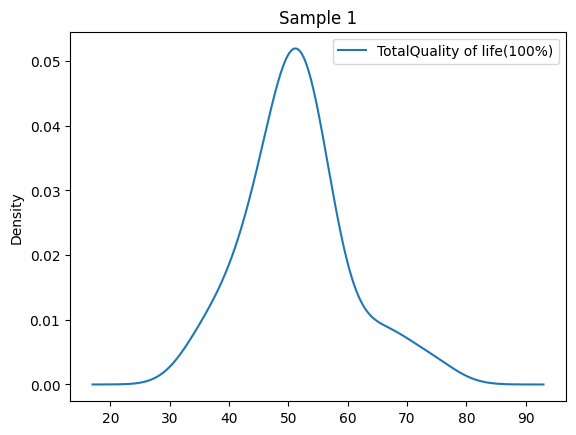

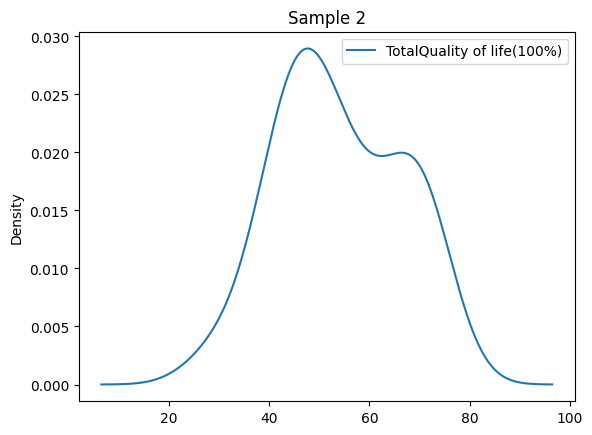

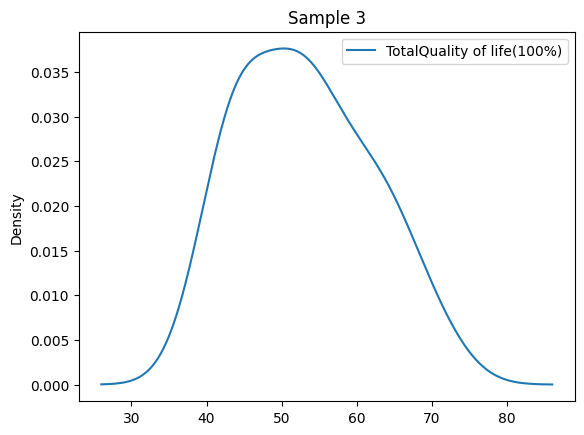

In [70]:
for i in range(0, 3):
  analysisSamples[i].plot(kind='density')
  plt.title(f'Sample {i+1}')
  plt.show()
  print("\n")

### - O Gráfico QQ

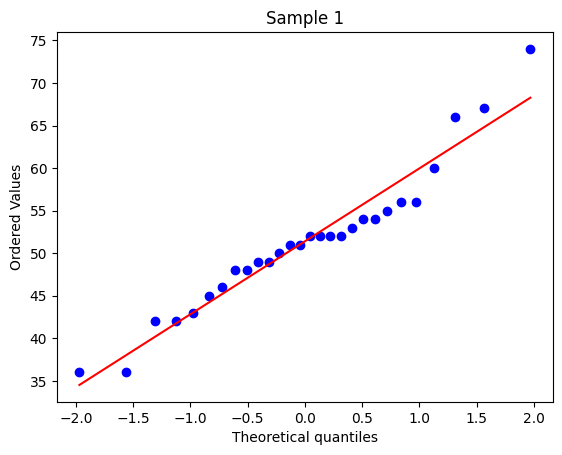

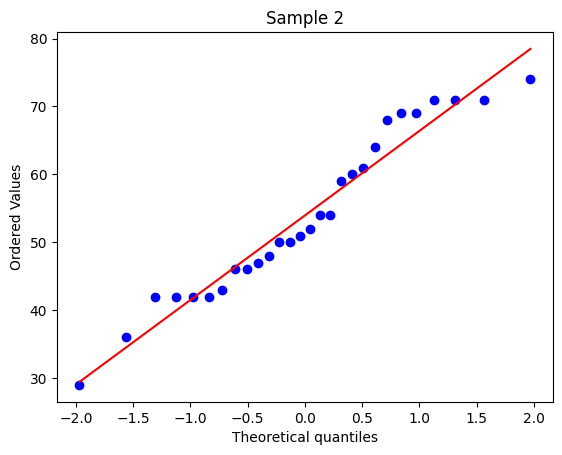

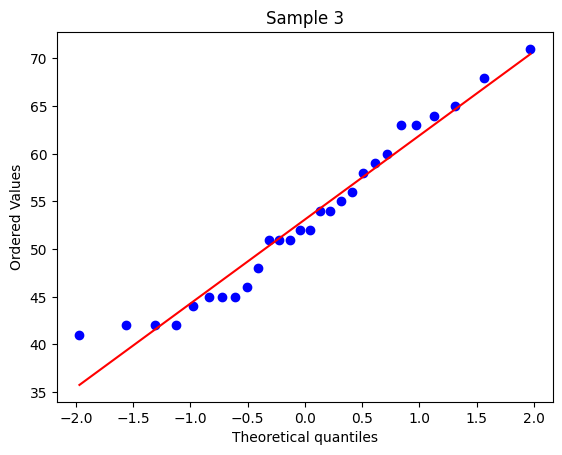

In [71]:
for i in range(0, 3):
  stats.probplot(analysisSamples[i]["TotalQuality of life(100%)"], dist='norm', plot=plt)
  plt.title(f'Sample {i+1}')
  plt.show()
  print("\n")

### - 01(um) boxplot com as métricas comparando as amostras

In [72]:
combined_dfs = pd.DataFrame({'Amostra1': analysisSamples[0]['TotalQuality of life(100%)'],
                             'Amostra2': analysisSamples[1]['TotalQuality of life(100%)'],
                             'Amostra3': analysisSamples[2]['TotalQuality of life(100%)']})
boxSample1 = px.box(combined_dfs)
boxSample1.show()

##Desvio padrao das amostras

In [73]:
for i in range(0, 3):
  print(f"\nSample {i+1}")
  display(np.std(analysisSamples[i]))


Sample 1


TotalQuality of life(100%)    8.329548
dtype: float64


Sample 2


TotalQuality of life(100%)    11.992504
dtype: float64


Sample 3


TotalQuality of life(100%)    8.465642
dtype: float64

#Regressão linear

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Quality of life in a country comparison.csv')
df = df.drop("Unnamed: 0", axis=1)
df.rename(columns={'TotalQuality of life(100%)': 'Total(100%)'}, inplace=True)

# Methods

def correlation(x, y):    
    x1 = (x - np.mean(x))
    y1 = (y - np.mean(y))
    
    num = np.sum(x1*y1)
    div = np.sqrt(np.sum(x1**2) * np.sum(y1**2))
    return num/div

class MyLinearRegression():
    def __init__(self):
        self.b0 = 0.0
        self.b1 = 0.0
    
    def fit(self, x, y):
        self.b1 = correlation(x, y) * np.std(y) / np.std(x)
        self.b0 = np.mean(y) - (self.b1 * np.mean(x))
    
    def predict(self, x):
        return self.b0 + self.b1*x
  
class PolynomialRegression():
    def __init__(self, degree=2):
        self.degree = degree
        self.b = None
        
    def fit(self, x, y):
        powers = self.__compute_powers(x)
        
        b1 = np.linalg.inv(np.dot(powers.T, powers))
        b2 = np.dot(powers.T, y)
        self.b = np.dot(b1, b2)
    
    def predict(self, x):
        powers = self.__compute_powers(x)
        return np.dot(powers, self.b)
    
    def __compute_powers(self, x):
        x = x.ravel()
        powers = np.empty((x.shape[0], self.degree + 1))
        powers[:, 0] = np.ones(x.shape[0])
        powers[:, 1] = x
        
        for p in range(2, self.degree+1):
            powers[:, p] = x**p
        return powers

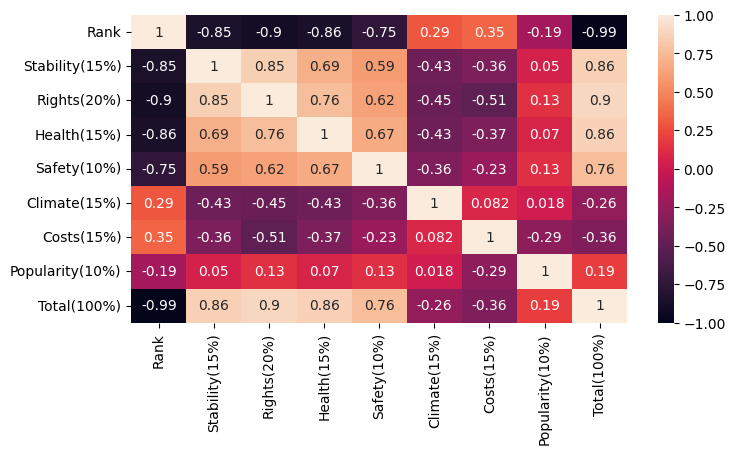

In [75]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
plt.show()

In [76]:
y = df['Total(100%)'].values.reshape(-1, 1) # Variável dependente
x = df['Rights(20%)'].values.reshape(-1, 1) # Variável independente

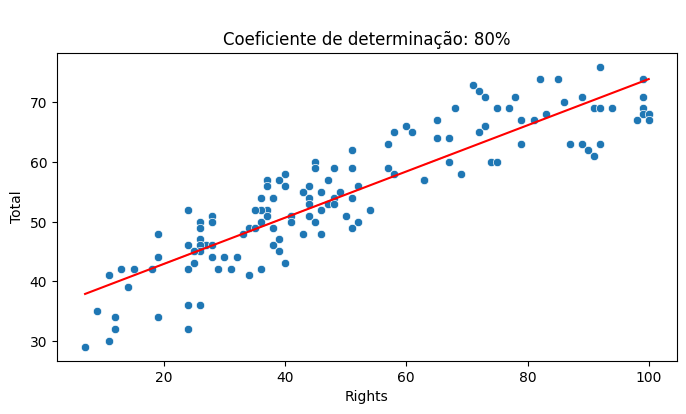

In [77]:
reg = MyLinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=x.ravel(), y=y.ravel())
sns.lineplot(x=x.ravel(), y=y_pred.ravel(), color='red')
plt.ylabel('Total')
plt.xlabel('Rights')

r2_linear = r2_score(y, y_pred)
plt.title(f'\nCoeficiente de determinação: {r2_linear*100:.0f}%')
plt.show()

sample = df.sample(n=10, random_state=i)
z = sample['Total(100%)'].values.reshape(-1, 1) # Variável dependente
w = sample['Rights(20%)'].values.reshape(-1, 1) # Variável independente

reg = MyLinearRegression()
reg.fit(w, z)
linear_results = reg.predict(w).flatten()
fig2 = px.box(linear_results)
fig2.show()


# **Regressão Polinomial**

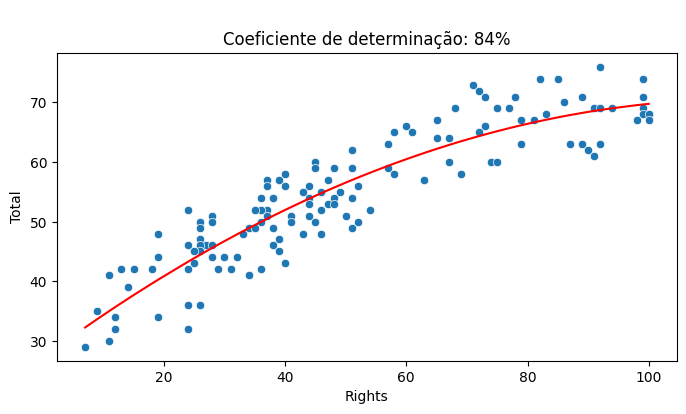

In [78]:
reg = PolynomialRegression()
reg.fit(x, y)
y_pred = reg.predict(x)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=x.ravel(), y=y.ravel())
sns.lineplot(x=x.ravel(), y=y_pred.ravel(), color='red')
plt.ylabel('Total')
plt.xlabel('Rights')

r2_polynomial = r2_score(y, y_pred)
plt.title(f'\nCoeficiente de determinação: {r2_polynomial*100:.0f}%')
plt.show()

sample = df.sample(n=10, random_state=i)
z = sample['Total(100%)'].values.reshape(-1, 1) # Variável dependente
w = sample['Rights(20%)'].values.reshape(-1, 1) # Variável independente

reg = PolynomialRegression()
reg.fit(w, z)
polynomial_results = reg.predict(w).flatten()

fig3 = px.box(polynomial_results)
fig3.show()

# **Regressão logísitica**

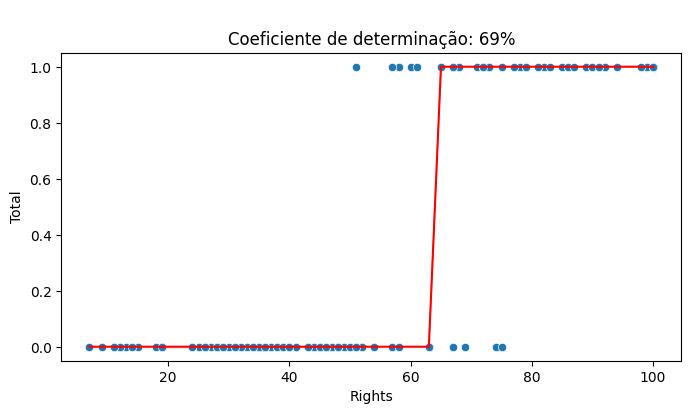

Acuracia: 93.0%


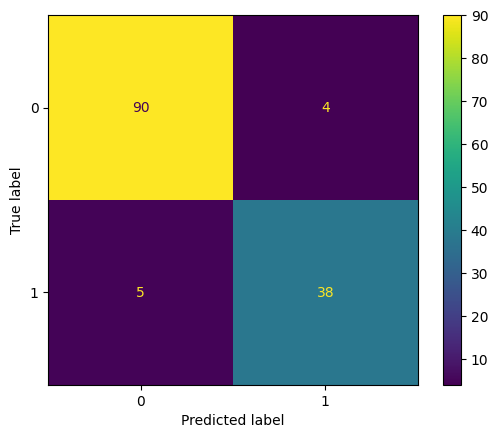

In [79]:
df['Rating'] = df['Total(100%)'].apply(lambda x: 1 if x > 60 else 0)
y = df['Rating'].values.reshape(-1, 1) # Variável dependente

reg = LogisticRegression()
reg.fit(x, y.ravel())
y_pred = reg.predict(x)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=x.ravel(), y=y.ravel())
sns.lineplot(x=x.ravel(), y=y_pred.ravel(), color='red')
plt.ylabel('Total')
plt.xlabel('Rights')

r2_logistic = r2_score(y, y_pred)
plt.title(f'\nCoeficiente de determinação: {r2_logistic*100:.0f}%')
plt.show()

cm = confusion_matrix(y, y_pred)

acc = round(((90 + 38) / (90+38+5+4)),2)
print(f"Acuracia: {acc*100}%")
cm_display = ConfusionMatrixDisplay(cm).plot()

# **Teste estatístico para 30 simulações de cada regressão**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



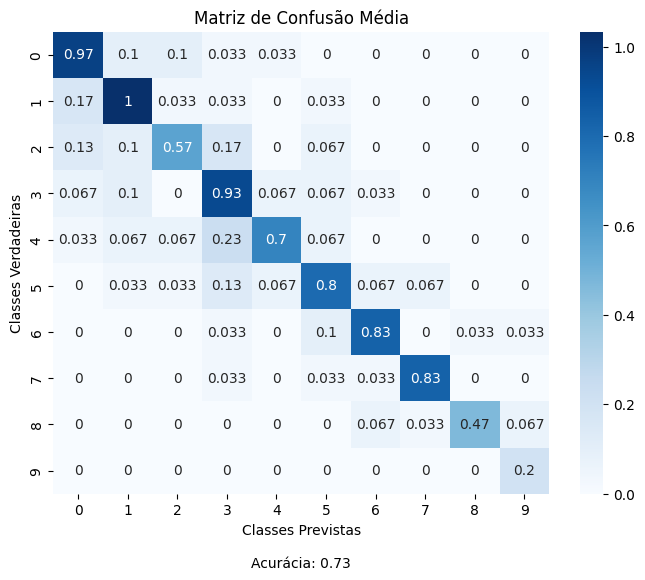

In [80]:
linear_results = pd.DataFrame()
polynomial_results = pd.DataFrame()
logistic_results = pd.DataFrame()
confusion_matrices = []

for i in range(30):
  sample = df.sample(n=10, random_state=i)
  y = sample['Total(100%)'].values.reshape(-1, 1) # Variável dependente
  x = sample['Rights(20%)'].values.reshape(-1, 1) # Variável independente

  reg = MyLinearRegression()
  reg.fit(x, y)
  linear_results[i+1] = reg.predict(x).flatten()

  reg = PolynomialRegression()
  reg.fit(x, y)
  polynomial_results[i+1] = reg.predict(x).flatten()

  reg = LogisticRegression()
  reg.fit(x, y.ravel())
  y_pred = reg.predict(x)

  cm = confusion_matrix(y, y_pred)
  confusion_matrices.append(cm)

media_linear = np.mean(linear_results)
fig = px.box(linear_results)
fig2 = px.box(media_linear)
fig.update_layout(
    title=dict(text='Regressão Linear', font=dict(size=40), y=.99),
    margin=dict(l=20, t=40)
)
fig.update_xaxes(title_text='Sample')
fig.show()
fig2.show()

media_poli = np.mean(polynomial_results)
fig4 = px.box(media_poli)
fig = px.box(polynomial_results)
fig.update_layout(
    title=dict(text='Regressão Polinomial', font=dict(size=40), y=.99),
    margin=dict(l=20, t=40)
)
fig.update_xaxes(title_text='Sample')
fig.show()
fig4.show()
# Suponha que você tenha uma lista de matrizes de confusão chamada "confusion_matrices"
# Encontre o número máximo de classes entre todas as matrizes de confusão
max_classes = max(cm.shape[0] for cm in confusion_matrices)

# Redimensione as matrizes de confusão para ter o mesmo número de classes
resized_matrices = []
for cm in confusion_matrices:
    # Calcule a diferença no número de classes
    diff_classes = max_classes - cm.shape[0]
    # Adicione linhas e colunas de zeros para igualar o número de classes
    resized_cm = np.pad(cm, ((0, diff_classes), (0, diff_classes)), mode='constant')
    resized_matrices.append(resized_cm)

# Calcule a matriz de confusão média
import seaborn as sns

# Código anterior...

# Calcule a matriz de confusão média
average_cm = np.mean(resized_matrices, axis=0)

# Calcule a acurácia usando a matriz de confusão média
accuracy = np.trace(average_cm) / np.sum(average_cm)

# Plot da matriz de confusão com a acurácia
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusão Média')
plt.xlabel('Classes Previstas')
plt.ylabel('Classes Verdadeiras')
plt.text(0.5, -0.15, f'Acurácia: {accuracy:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()